# Data Analysis, Feature Engineering

In [1]:
# Load dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import datetime

import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_squared_log_error, r2_score, accuracy_score, make_scorer, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectFromModel

from sklearn import datasets, svm

In [2]:
df = pd.read_csv('data/bike_temp_clean.csv')

In [35]:
df

,num_trips,start_datetime,start_station_id,start_station_longitude,start_station_latitude,avg_trip_duration,num_trips_1hr,num_trips_2hr,num_trips_3hr,num_trips_4hr,...,avg_daily_wind_speed,precipitation,snowfall,snow_depth,temp_max,temp_min,fog,heavy_fog,thunder,haze
0,0.0,2019-05-08 00:00:00,3183,-74.033459,40.716247,0.0,0.0,2.0,3.0,2.0,...,4.47,0.00,0.0,0.0,71,55,True,False,False,False
1,0.0,2019-05-08 00:00:00,3184,-74.033552,40.714145,0.0,0.0,1.0,0.0,0.0,...,4.47,0.00,0.0,0.0,71,55,True,False,False,False
2,0.0,2019-05-08 00:00:00,3185,-74.043845,40.717732,0.0,1.0,1.0,0.0,2.0,...,4.47,0.00,0.0,0.0,71,55,True,False,False,False
3,0.0,2019-05-08 00:00:00,3186,-74.043117,40.719586,0.0,0.0,4.0,8.0,8.0,...,4.47,0.00,0.0,0.0,71,55,True,False,False,False
4,0.0,2019-05-08 00:00:00,3187,-74.038051,40.721124,0.0,0.0,1.0,2.0,0.0,...,4.47,0.00,0.0,0.0,71,55,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108115,0.0,2019-07-31 23:00:00,3679,-74.071455,40.722104,0.0,0.0,0.0,0.0,2.0,...,2.91,0.36,0.0,0.0,87,70,True,False,True,False
108116,1.0,2019-07-31 23:00:00,3681,-74.037683,40.715178,673.0,1.0,0.0,2.0,1.0,...,2.91,0.36,0.0,0.0,87,70,True,False,True,False
108117,0.0,2019-07-31 23:00:00,3694,-74.078900,40.711130,0.0,0.0,0.0,0.0,0.0,...,2.91,0.36,0.0,0.0,87,70,True,False,True,False
108118,0.0,2019-07-31 23:00:00,3791,-74.046964,40.735208,0.0,0.0,0.0,2.0,1.0,...,2.91,0.36,0.0,0.0,87,70,True,False,True,False


## Data Exploration

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108120 entries, 0 to 108119
Data columns (total 30 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   num_trips                108120 non-null  float64
 1   start_datetime           108120 non-null  object 
 2   start_station_id         108120 non-null  int64  
 3   start_station_longitude  108120 non-null  float64
 4   start_station_latitude   108120 non-null  float64
 5   avg_trip_duration        108120 non-null  float64
 6   num_trips_1hr            108120 non-null  float64
 7   num_trips_2hr            108120 non-null  float64
 8   num_trips_3hr            108120 non-null  float64
 9   num_trips_4hr            108120 non-null  float64
 10  num_trips_5hr            108120 non-null  float64
 11  num_trips_6hr            108120 non-null  float64
 12  num_trips_24hr           108120 non-null  float64
 13  num_trips_48hr           108120 non-null  float64
 14  num_

In [37]:
df.corr()

,num_trips,start_station_id,start_station_longitude,start_station_latitude,avg_trip_duration,num_trips_1hr,num_trips_2hr,num_trips_3hr,num_trips_4hr,num_trips_5hr,...,avg_daily_wind_speed,precipitation,snowfall,snow_depth,temp_max,temp_min,fog,heavy_fog,thunder,haze
num_trips,1.000000,-8.651456e-02,1.596806e-01,-5.777601e-02,0.026238,0.623053,0.412487,0.280602,0.187954,0.126078,...,-3.217631e-02,-4.402617e-02,NaN,NaN,3.992891e-02,3.192160e-02,-2.926086e-02,-6.823561e-03,-2.035581e-02,-1.095460e-02
start_station_id,-0.086515,1.000000e+00,-9.102800e-02,-1.279870e-01,-0.008129,-0.086513,-0.086533,-0.086552,-0.086556,-0.086599,...,-8.811932e-15,-2.118271e-15,NaN,NaN,3.011950e-14,3.836185e-14,-1.101766e-14,2.579217e-15,-1.167519e-14,1.620751e-14
start_station_longitude,0.159681,-9.102800e-02,1.000000e+00,-4.582265e-02,0.003787,0.159659,0.159641,0.159641,0.159652,0.159722,...,-6.355504e-12,4.490648e-12,NaN,NaN,5.284431e-12,3.097359e-12,1.986767e-12,9.538912e-13,6.620331e-12,-2.029961e-11
start_station_latitude,-0.057776,-1.279870e-01,-4.582265e-02,1.000000e+00,-0.003001,-0.057785,-0.057774,-0.057784,-0.057783,-0.057771,...,4.087986e-12,-1.756090e-13,NaN,NaN,-1.493738e-11,-1.752556e-11,4.064702e-12,5.507430e-14,-7.155176e-13,3.732363e-12
avg_trip_duration,0.026238,-8.128621e-03,3.787075e-03,-3.001489e-03,1.000000,0.013539,0.014179,0.013591,0.008553,0.005038,...,1.608441e-03,-8.285856e-03,NaN,NaN,8.178390e-03,3.584160e-03,-4.545736e-03,-2.242531e-03,2.935794e-03,1.122812e-03
num_trips_1hr,0.623053,-8.651270e-02,1.596594e-01,-5.778452e-02,0.013539,1.000000,0.623044,0.412512,0.280734,0.187983,...,-3.195943e-02,-4.345983e-02,NaN,NaN,4.007934e-02,3.196460e-02,-2.898730e-02,-5.958291e-03,-1.995676e-02,-1.071153e-02
num_trips_2hr,0.412487,-8.653278e-02,1.596411e-01,-5.777398e-02,0.014179,0.623044,1.000000,0.623163,0.412760,0.280887,...,-3.138265e-02,-4.187391e-02,NaN,NaN,4.030429e-02,3.218070e-02,-2.813525e-02,-4.754631e-03,-1.798568e-02,-1.026169e-02
num_trips_3hr,0.280602,-8.655248e-02,1.596413e-01,-5.778390e-02,0.013591,0.412512,0.623163,1.000000,0.623075,0.412556,...,-3.175978e-02,-4.018400e-02,NaN,NaN,4.089313e-02,3.265463e-02,-2.900116e-02,-4.661881e-03,-1.662861e-02,-1.034247e-02
num_trips_4hr,0.187954,-8.655564e-02,1.596523e-01,-5.778325e-02,0.008553,0.280734,0.412760,0.623075,1.000000,0.622783,...,-3.237198e-02,-3.633825e-02,NaN,NaN,4.197049e-02,3.340710e-02,-2.883528e-02,-2.781897e-03,-1.389426e-02,-1.002687e-02
num_trips_5hr,0.126078,-8.659940e-02,1.597224e-01,-5.777146e-02,0.005038,0.187983,0.280887,0.412556,0.622783,1.000000,...,-3.146845e-02,-3.256248e-02,NaN,NaN,4.246924e-02,3.361933e-02,-2.932483e-02,-1.523951e-03,-1.161248e-02,-8.907878e-03


In [7]:
df.describe()

,num_trips,start_station_id,start_station_longitude,start_station_latitude,avg_trip_duration,num_trips_1hr,num_trips_2hr,num_trips_3hr,num_trips_4hr,num_trips_5hr,...,day_of_week,day_of_month,month,hour,avg_daily_wind_speed,precipitation,snowfall,snow_depth,temp_max,temp_min
count,108120.000000,108120.000000,108120.000000,108120.000000,1.081200e+05,108120.000000,108120.000000,108120.000000,108120.000000,108120.000000,...,108120.000000,108120.000000,108120.000000,108120.000000,108120.000000,108120.000000,108120.0,108120.0,108120.000000,108120.000000
mean,1.029403,3326.132075,-74.051605,40.723968,3.791670e+02,1.029403,1.029292,1.029153,1.028811,1.028801,...,2.988235,16.811765,6.082353,11.500000,3.915412,0.193529,0.0,0.0,79.694118,64.611765
std,2.432913,188.388673,0.013572,0.009304,8.127193e+03,2.432898,2.432888,2.432591,2.431369,2.430834,...,1.991131,8.487392,0.800177,6.922219,1.460853,0.374182,0.0,0.0,9.138228,8.349881
min,0.000000,3183.000000,-74.083639,40.709651,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,5.000000,0.000000,1.340000,0.000000,0.0,0.0,48.000000,42.000000
25%,0.000000,3201.000000,-74.062859,40.716870,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,10.000000,5.000000,5.750000,2.680000,0.000000,0.0,0.0,73.000000,59.000000
50%,0.000000,3225.000000,-74.049638,40.722104,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.000000,17.000000,6.000000,11.500000,3.800000,0.000000,0.0,0.0,81.000000,66.000000
75%,1.000000,3281.000000,-74.041050,40.727596,3.440000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,24.000000,7.000000,17.250000,4.920000,0.170000,0.0,0.0,87.000000,71.000000
max,70.000000,3792.000000,-74.032108,40.748716,1.729020e+06,70.000000,70.000000,70.000000,70.000000,70.000000,...,6.000000,31.000000,7.000000,23.000000,8.500000,1.820000,0.0,0.0,95.000000,82.000000


<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


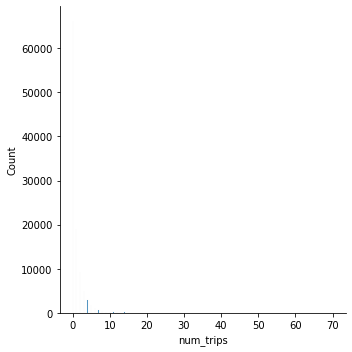

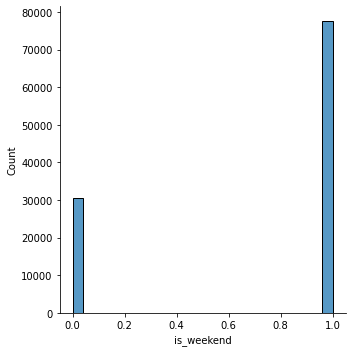

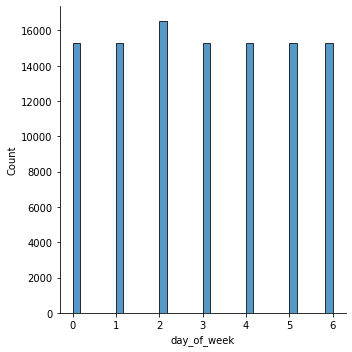

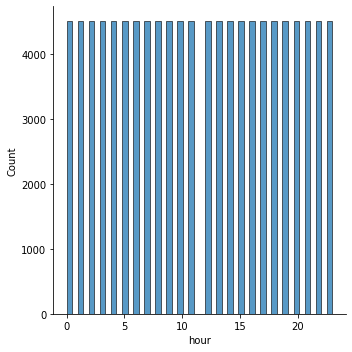

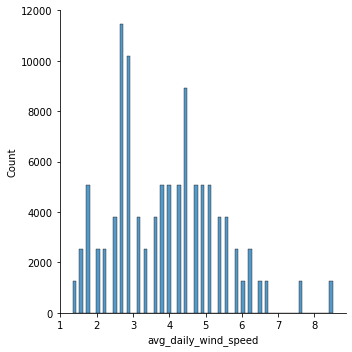

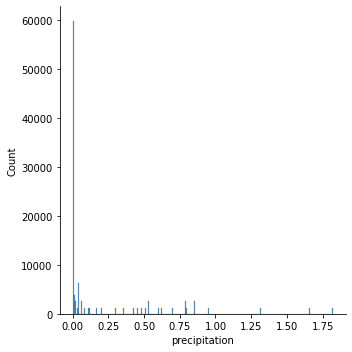

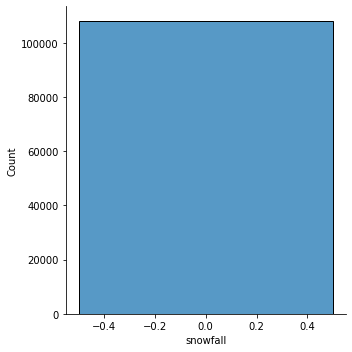

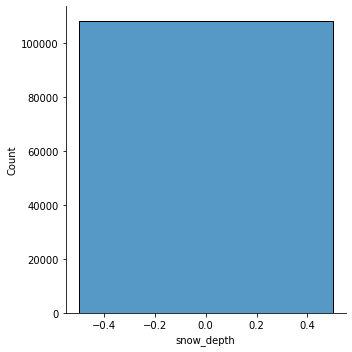

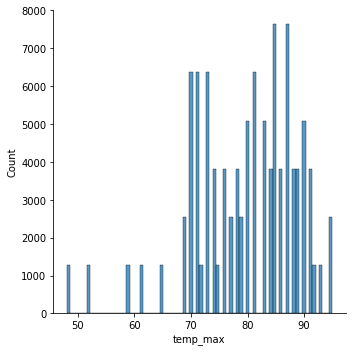

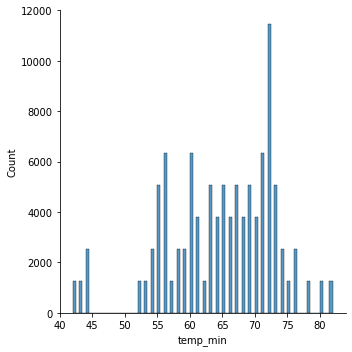

In [18]:
# Plot distribution of num_trips, is_weekend, day_of_week, and hour
sns.displot(df['num_trips'])
sns.displot(df['is_weekend'])
sns.displot(df['day_of_week'])
sns.displot(df['hour'])
sns.displot(df['avg_daily_wind_speed'])
sns.displot(df['precipitation'])
sns.displot(df['snowfall'])
sns.displot(df['snow_depth'])
sns.displot(df['temp_max'])
sns.displot(df['temp_min'])

Note that num_trips does not look like a Gaussian distribution, so lets use some common transformations: log, square root, and cube root.

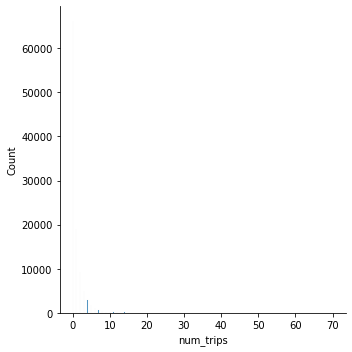

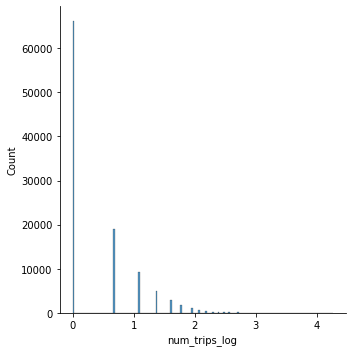

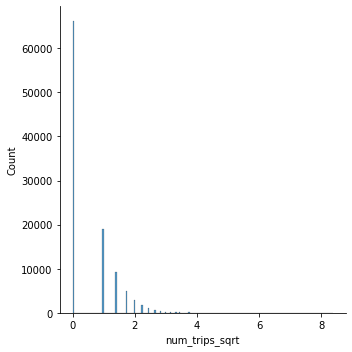

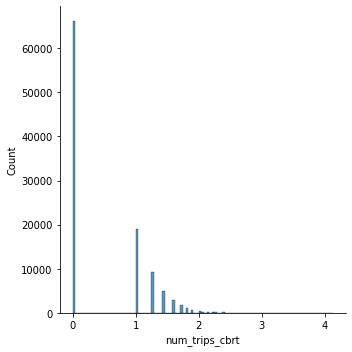

In [38]:
df['num_trips_log'] = np.log1p(df['num_trips'])
df['num_trips_sqrt'] = np.sqrt(df['num_trips'])
df['num_trips_cbrt'] = np.cbrt(df['num_trips'])
# df = df.reindex(columns=['num_trips', 'num_trips_log', 'start_datetime', 'start_station_id', 'avg_trip_duration', 'is_weekend', 'day_of_week', 'hour'])
sns.displot(df['num_trips'])
sns.displot(df['num_trips_log'])
sns.displot(df['num_trips_sqrt'])
sns.displot(df['num_trips_cbrt'])

num_trips_log does not appear Gaussian, so lets not transform.

In [20]:
df.drop(columns=['num_trips_log'], inplace=True)

Now lets plot the num_trips over time

<AxesSubplot:xlabel='start_datetime'>

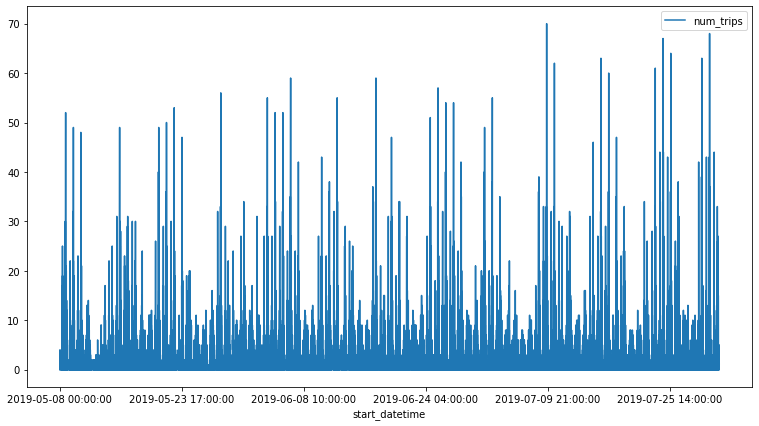

In [21]:
df.plot(x='start_datetime', y='num_trips', figsize=(13,7))

The number of trips appear to increase over the course of the month.

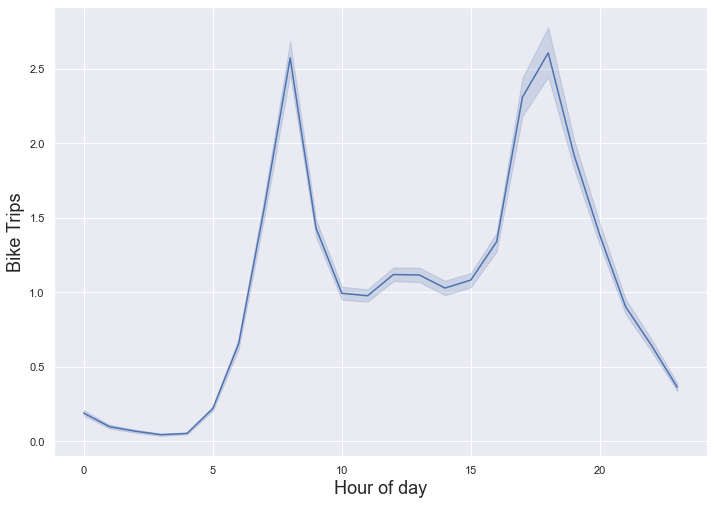

In [20]:
sns.set_style("darkgrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
p = sns.lineplot(data=df, x='hour', y='num_trips')
p.set_xlabel('Hour of day', fontsize=18)
p.set_ylabel('Bike Trips', fontsize=18)

fig = p.get_figure()
fig.savefig('figs/hourVStrips.png')


The distribution of num_trips by hour appears to have two peaks in the AM and PM peak hours

<AxesSubplot:xlabel='start_datetime'>

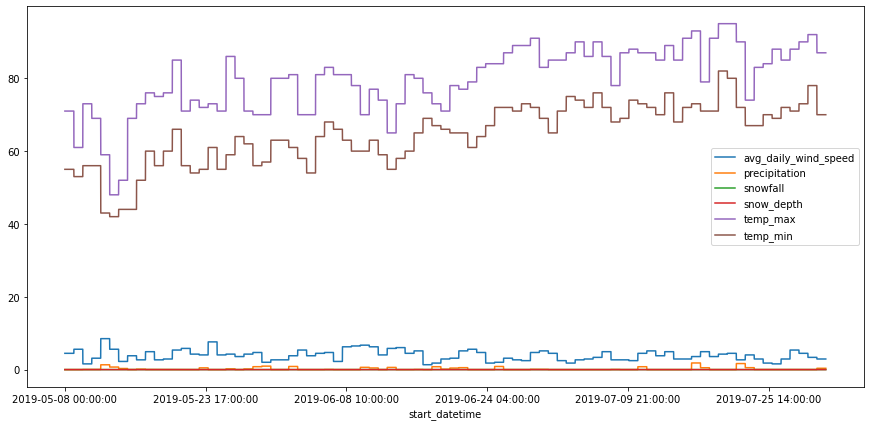

In [23]:
df.plot(x='start_datetime', y=['avg_daily_wind_speed', 'precipitation', 'snowfall', 'snow_depth', 'temp_max', 'temp_min'], figsize=(15,7))

In [24]:
df.columns

Index(['num_trips', 'start_datetime', 'start_station_id',
       'start_station_longitude', 'start_station_latitude',
       'avg_trip_duration', 'num_trips_1hr', 'num_trips_2hr', 'num_trips_3hr',
       'num_trips_4hr', 'num_trips_5hr', 'num_trips_6hr', 'num_trips_24hr',
       'num_trips_48hr', 'num_trips_week', 'day_of_week', 'day_of_month',
       'month', 'hour', 'is_weekend', 'avg_daily_wind_speed', 'precipitation',
       'snowfall', 'snow_depth', 'temp_max', 'temp_min', 'fog', 'heavy_fog',
       'thunder', 'haze'],
      dtype='object')

<AxesSubplot:>

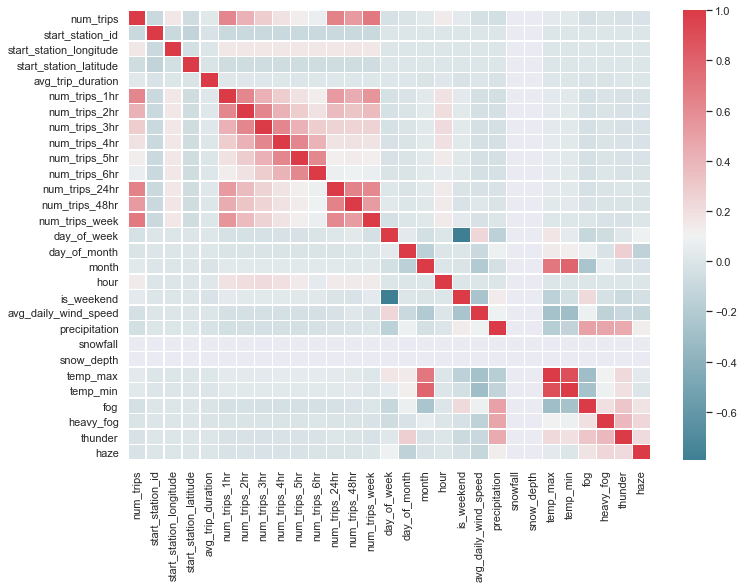

In [21]:
# Plot heatmap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df.corr(), cmap=cmap, linewidths=0.5)

Note that is_weekend and day_of_week are correlated and temp_min and temp_max are correlated. We should likely choose just one of them, but we will test this out with the XGBoost model and importance scores.

## Feature Engineering

Because hour and day_of_week is a cyclical feature, we will encode it using cosine and sine

In [23]:
df_fe = df

In [24]:
# Encode time series with cyclical features
df_fe['hour_sin'] = np.sin((2 * np.pi * df_fe['hour']) / max(df_fe['hour']))
df_fe['hour_cos'] = np.cos((2 * np.pi * df_fe['hour']) / max(df_fe['hour']))
df_fe['day_of_week_sin'] = np.sin((2 * np.pi * df_fe['day_of_week']) / max(df_fe['day_of_week']))
df_fe['day_of_week_cos'] = np.cos((2 * np.pi * df_fe['day_of_week']) / max(df_fe['day_of_week']))
df_fe['day_of_month_sin'] = np.sin((2 * np.pi * df_fe['day_of_month']) / max(df_fe['day_of_month']))
df_fe['day_of_month_cos'] = np.cos((2 * np.pi * df_fe['day_of_month']) / max(df_fe['day_of_month']))
df_fe['month_sin'] = np.sin((2 * np.pi * df_fe['month']) / max(df_fe['month']))
df_fe['month_cos'] = np.cos((2 * np.pi * df_fe['month']) / max(df_fe['month']))
df_fe.head()

,num_trips,start_datetime,start_station_id,start_station_longitude,start_station_latitude,avg_trip_duration,num_trips_1hr,num_trips_2hr,num_trips_3hr,num_trips_4hr,...,thunder,haze,hour_sin,hour_cos,day_of_week_sin,day_of_week_cos,day_of_month_sin,day_of_month_cos,month_sin,month_cos
0,0.0,2019-05-08 00:00:00,3183,-74.033459,40.716247,0.0,0.0,2.0,3.0,2.0,...,False,False,0.0,1.0,0.866025,-0.5,0.998717,-0.050649,-0.974928,-0.222521
1,0.0,2019-05-08 00:00:00,3184,-74.033552,40.714145,0.0,0.0,1.0,0.0,0.0,...,False,False,0.0,1.0,0.866025,-0.5,0.998717,-0.050649,-0.974928,-0.222521
2,0.0,2019-05-08 00:00:00,3185,-74.043845,40.717732,0.0,1.0,1.0,0.0,2.0,...,False,False,0.0,1.0,0.866025,-0.5,0.998717,-0.050649,-0.974928,-0.222521
3,0.0,2019-05-08 00:00:00,3186,-74.043117,40.719586,0.0,0.0,4.0,8.0,8.0,...,False,False,0.0,1.0,0.866025,-0.5,0.998717,-0.050649,-0.974928,-0.222521
4,0.0,2019-05-08 00:00:00,3187,-74.038051,40.721124,0.0,0.0,1.0,2.0,0.0,...,False,False,0.0,1.0,0.866025,-0.5,0.998717,-0.050649,-0.974928,-0.222521


In [25]:
df_fe.columns

Index(['num_trips', 'start_datetime', 'start_station_id',
       'start_station_longitude', 'start_station_latitude',
       'avg_trip_duration', 'num_trips_1hr', 'num_trips_2hr', 'num_trips_3hr',
       'num_trips_4hr', 'num_trips_5hr', 'num_trips_6hr', 'num_trips_24hr',
       'num_trips_48hr', 'num_trips_week', 'day_of_week', 'day_of_month',
       'month', 'hour', 'is_weekend', 'avg_daily_wind_speed', 'precipitation',
       'snowfall', 'snow_depth', 'temp_max', 'temp_min', 'fog', 'heavy_fog',
       'thunder', 'haze', 'hour_sin', 'hour_cos', 'day_of_week_sin',
       'day_of_week_cos', 'day_of_month_sin', 'day_of_month_cos', 'month_sin',
       'month_cos'],
      dtype='object')

We previously noticed that bike demand was significant during the AM and PM peak hour times, lets add features for that. 

In [26]:
# Add day/night hours
df_fe['is_am_peak'] = (df_fe['hour']>=7) & (df_fe['hour']<=9)
df_fe['is_pm_peak'] = (df_fe['hour']>=16) & (df_fe['hour']<=19)
df_fe.head()

,num_trips,start_datetime,start_station_id,start_station_longitude,start_station_latitude,avg_trip_duration,num_trips_1hr,num_trips_2hr,num_trips_3hr,num_trips_4hr,...,hour_sin,hour_cos,day_of_week_sin,day_of_week_cos,day_of_month_sin,day_of_month_cos,month_sin,month_cos,is_am_peak,is_pm_peak
0,0.0,2019-05-08 00:00:00,3183,-74.033459,40.716247,0.0,0.0,2.0,3.0,2.0,...,0.0,1.0,0.866025,-0.5,0.998717,-0.050649,-0.974928,-0.222521,False,False
1,0.0,2019-05-08 00:00:00,3184,-74.033552,40.714145,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.866025,-0.5,0.998717,-0.050649,-0.974928,-0.222521,False,False
2,0.0,2019-05-08 00:00:00,3185,-74.043845,40.717732,0.0,1.0,1.0,0.0,2.0,...,0.0,1.0,0.866025,-0.5,0.998717,-0.050649,-0.974928,-0.222521,False,False
3,0.0,2019-05-08 00:00:00,3186,-74.043117,40.719586,0.0,0.0,4.0,8.0,8.0,...,0.0,1.0,0.866025,-0.5,0.998717,-0.050649,-0.974928,-0.222521,False,False
4,0.0,2019-05-08 00:00:00,3187,-74.038051,40.721124,0.0,0.0,1.0,2.0,0.0,...,0.0,1.0,0.866025,-0.5,0.998717,-0.050649,-0.974928,-0.222521,False,False


In [27]:
df_fe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108120 entries, 0 to 108119
Data columns (total 40 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   num_trips                108120 non-null  float64
 1   start_datetime           108120 non-null  object 
 2   start_station_id         108120 non-null  int64  
 3   start_station_longitude  108120 non-null  float64
 4   start_station_latitude   108120 non-null  float64
 5   avg_trip_duration        108120 non-null  float64
 6   num_trips_1hr            108120 non-null  float64
 7   num_trips_2hr            108120 non-null  float64
 8   num_trips_3hr            108120 non-null  float64
 9   num_trips_4hr            108120 non-null  float64
 10  num_trips_5hr            108120 non-null  float64
 11  num_trips_6hr            108120 non-null  float64
 12  num_trips_24hr           108120 non-null  float64
 13  num_trips_48hr           108120 non-null  float64
 14  num_

In [34]:
pd.set_option('display.max_columns', None)
df_fe.describe()

,num_trips,start_station_id,start_station_longitude,start_station_latitude,avg_trip_duration,num_trips_1hr,num_trips_2hr,num_trips_3hr,num_trips_4hr,num_trips_5hr,num_trips_6hr,num_trips_24hr,num_trips_48hr,num_trips_week,day_of_week,day_of_month,month,hour,avg_daily_wind_speed,precipitation,snowfall,snow_depth,temp_max,temp_min,hour_sin,hour_cos,day_of_week_sin,day_of_week_cos,day_of_month_sin,day_of_month_cos,month_sin,month_cos
count,108120.000000,108120.000000,108120.000000,108120.000000,1.081200e+05,108120.000000,108120.000000,108120.000000,108120.000000,108120.000000,108120.000000,108120.000000,108120.000000,108120.000000,108120.000000,108120.000000,108120.000000,108120.000000,108120.000000,108120.000000,108120.0,108120.0,108120.000000,108120.000000,1.081200e+05,108120.000000,108120.000000,108120.000000,108120.000000,108120.000000,1.081200e+05,108120.000000
mean,1.029403,3326.132075,-74.051605,40.723968,3.791670e+02,1.029403,1.029292,1.029153,1.028811,1.028801,1.029273,1.029652,1.026979,1.004347,2.988235,16.811765,6.082353,11.500000,3.915412,0.193529,0.0,0.0,79.694118,64.611765,-6.492936e-17,0.041667,0.010189,0.135294,-0.054901,-0.063952,-5.512143e-01,0.521932
std,2.432913,188.388673,0.013572,0.009304,8.127193e+03,2.432898,2.432888,2.432591,2.431369,2.430834,2.435043,2.435279,2.423296,2.391407,1.991131,8.487392,0.800177,6.922219,1.460853,0.374182,0.0,0.0,9.138228,8.349881,6.922219e-01,0.720487,0.657460,0.741180,0.708103,0.701067,4.245887e-01,0.493435
min,0.000000,3183.000000,-74.083639,40.709651,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.340000,0.000000,0.0,0.0,48.000000,42.000000,-9.976688e-01,-0.990686,-0.866025,-1.000000,-0.998717,-0.994869,-9.749279e-01,-0.222521
25%,0.000000,3201.000000,-74.062859,40.716870,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,10.000000,5.000000,5.750000,2.680000,0.000000,0.0,0.0,73.000000,59.000000,-6.560249e-01,-0.626438,-0.866025,-0.500000,-0.724793,-0.758758,-9.749279e-01,-0.222521
50%,0.000000,3225.000000,-74.049638,40.722104,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,17.000000,6.000000,11.500000,3.800000,0.000000,0.0,0.0,81.000000,66.000000,-1.224647e-16,0.067607,0.000000,0.500000,-0.101168,-0.050649,-7.818315e-01,0.623490
75%,1.000000,3281.000000,-74.041050,40.727596,3.440000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,24.000000,7.000000,17.250000,4.920000,0.170000,0.0,0.0,87.000000,71.000000,6.560249e-01,0.725520,0.866025,1.000000,0.651372,0.688967,-2.449294e-16,1.000000
max,70.000000,3792.000000,-74.032108,40.748716,1.729020e+06,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,6.000000,31.000000,7.000000,23.000000,8.500000,1.820000,0.0,0.0,95.000000,82.000000,9.976688e-01,1.000000,0.866025,1.000000,0.998717,1.000000,-2.449294e-16,1.000000


### Export Data

In [31]:
# Export df
df_fe.to_csv('data/bike_temp_fe.csv', index=False)

In [32]:
# Check df exported
#pd.read_csv('data/bike_data_clean.csv').head()
pd.read_csv('data/bike_temp_fe.csv')

,num_trips,start_datetime,start_station_id,start_station_longitude,start_station_latitude,avg_trip_duration,num_trips_1hr,num_trips_2hr,num_trips_3hr,num_trips_4hr,...,hour_sin,hour_cos,day_of_week_sin,day_of_week_cos,day_of_month_sin,day_of_month_cos,month_sin,month_cos,is_am_peak,is_pm_peak
0,0.0,2019-05-08 00:00:00,3183,-74.033459,40.716247,0.0,0.0,2.0,3.0,2.0,...,0.000000e+00,1.0,0.866025,-0.5,9.987165e-01,-0.050649,-9.749279e-01,-0.222521,False,False
1,0.0,2019-05-08 00:00:00,3184,-74.033552,40.714145,0.0,0.0,1.0,0.0,0.0,...,0.000000e+00,1.0,0.866025,-0.5,9.987165e-01,-0.050649,-9.749279e-01,-0.222521,False,False
2,0.0,2019-05-08 00:00:00,3185,-74.043845,40.717732,0.0,1.0,1.0,0.0,2.0,...,0.000000e+00,1.0,0.866025,-0.5,9.987165e-01,-0.050649,-9.749279e-01,-0.222521,False,False
3,0.0,2019-05-08 00:00:00,3186,-74.043117,40.719586,0.0,0.0,4.0,8.0,8.0,...,0.000000e+00,1.0,0.866025,-0.5,9.987165e-01,-0.050649,-9.749279e-01,-0.222521,False,False
4,0.0,2019-05-08 00:00:00,3187,-74.038051,40.721124,0.0,0.0,1.0,2.0,0.0,...,0.000000e+00,1.0,0.866025,-0.5,9.987165e-01,-0.050649,-9.749279e-01,-0.222521,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108115,0.0,2019-07-31 23:00:00,3679,-74.071455,40.722104,0.0,0.0,0.0,0.0,2.0,...,-2.449294e-16,1.0,0.866025,-0.5,-2.449294e-16,1.000000,-2.449294e-16,1.000000,False,False
108116,1.0,2019-07-31 23:00:00,3681,-74.037683,40.715178,673.0,1.0,0.0,2.0,1.0,...,-2.449294e-16,1.0,0.866025,-0.5,-2.449294e-16,1.000000,-2.449294e-16,1.000000,False,False
108117,0.0,2019-07-31 23:00:00,3694,-74.078900,40.711130,0.0,0.0,0.0,0.0,0.0,...,-2.449294e-16,1.0,0.866025,-0.5,-2.449294e-16,1.000000,-2.449294e-16,1.000000,False,False
108118,0.0,2019-07-31 23:00:00,3791,-74.046964,40.735208,0.0,0.0,0.0,2.0,1.0,...,-2.449294e-16,1.0,0.866025,-0.5,-2.449294e-16,1.000000,-2.449294e-16,1.000000,False,False
